In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd /Users/Brett/Code/bricolage-dev/
from bricolage import lineage, threshold3, graph, analysis
from bricolage.analysis_ext import CausalFlowAnalyzer, Information, MutualInfoAnalyzer, NetworkAnalysis

/Users/Brett/Dropbox/Code/bricolage-dev


In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sb
import numpy as np
import bisect
from IPython.display import Image

In [4]:
def show_network(n, s=True):
    graph.save_network_as_fullgraph(n, name='test', simplify=s)
    return Image(filename='network-test.png', height=100) 

In [5]:
treat = lineage.Treatment("/Users/Brett/Desktop/simple/01-(a-and-not-c)-or-(b-and-c)/")

In [6]:
rep = treat.replicates[13]
lin = rep.get_lineage(readonly=True)
targ = lin.targets[0]
flow = [0, 0, 1]

In [7]:
pf, pcut, pm, pc = analysis.make_population_frames(lin.population, targ, flow)
pc.describe()

,C1,C2,C3,C4,C5,C6,C7,C8
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.701811,0.962114,0.138774,0.854407,0.010992,1.442984,0.845434,1.650482
std,0.392429,0.296155,0.180078,0.542393,0.060601,0.402724,0.681019,0.551035
min,0.000000,0.112739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.433834,0.841777,0.000000,0.000000,0.000000,1.045566,0.000000,0.844065
50%,1.716917,1.140722,0.062312,1.146385,0.000000,1.311278,0.778894,1.967616
75%,1.967616,1.140722,0.235606,1.286312,0.000000,1.963558,1.467616,2.000000
max,2.548795,2.002797,1.480178,2.115949,0.634039,2.311278,2.311278,2.548795


In [22]:
pc.query('C1 > 2.5').head()

,C1,C2,C3,C4,C5,C6,C7,C8
40,2.548795,1.140722,0,1.286312,0,1.430304,1.360073,2.548795
57,2.548795,1.140722,0,1.286312,0,1.430304,1.360073,2.548795
89,2.548795,1.140722,0,1.286312,0,1.430304,1.467616,1.967616
138,2.548795,1.140722,0,1.286312,0,1.430304,1.467616,1.967616
144,2.548795,1.140722,0,1.286312,0,1.430304,1.360073,2.548795


In [9]:
pcut.query('cuts == 1.0').count()

cuts    498
dtype: int64

1.0
saving test


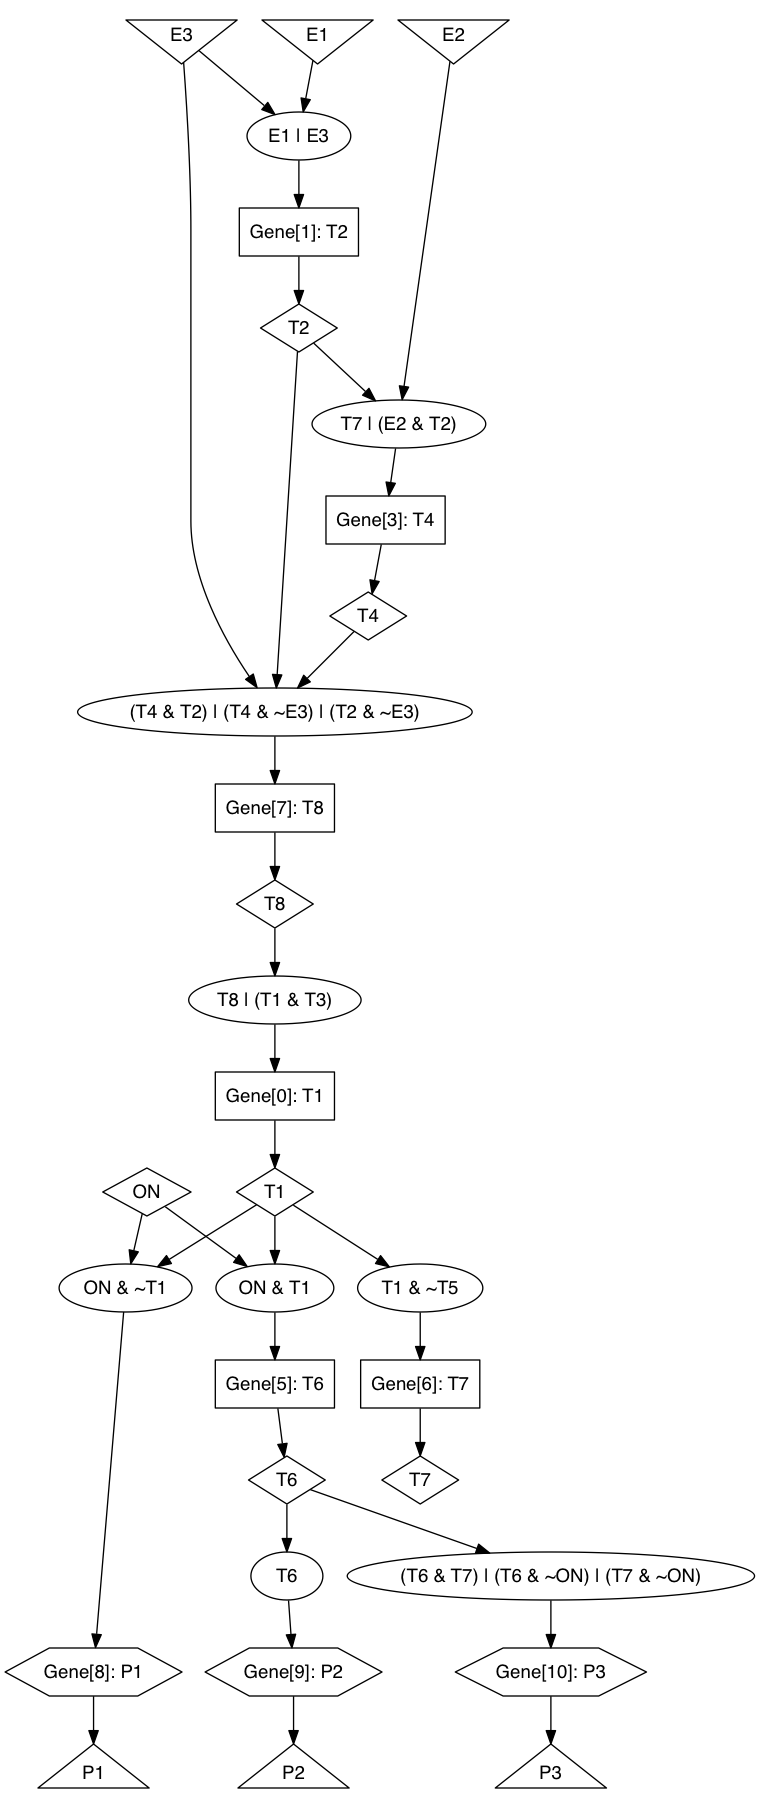

In [23]:
net = lin.population[144]
print net.fitness
show_network(net)

In [17]:
anc = lin.get_ancestry(net.identifier)
ff, mf, cf = analysis.make_ancestry_frames(anc, targ, flow)

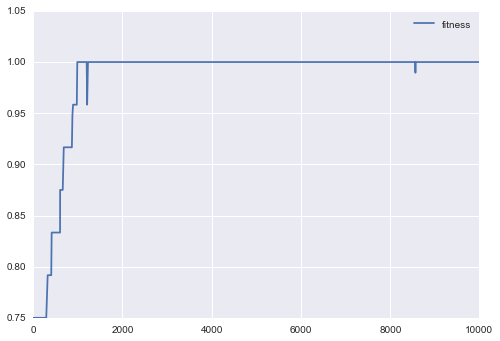

In [13]:
ff.plot()

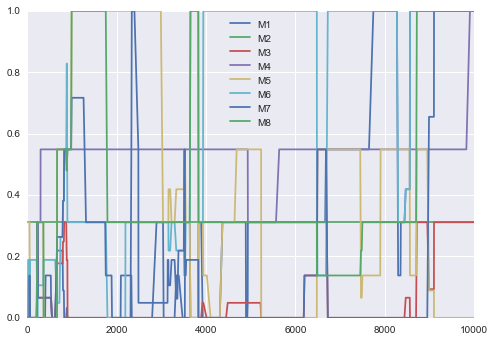

In [14]:
mf.plot()

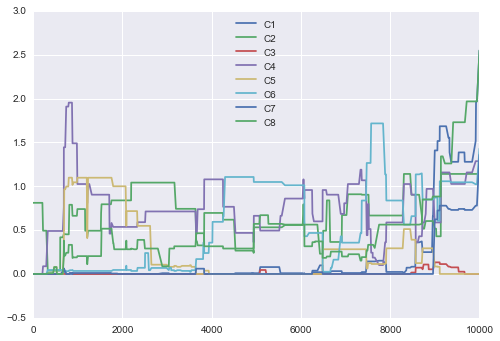

In [15]:
cf.plot()

In [16]:
cuts = analysis.make_cut_frame(anc)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10e2a1810>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10e499810>], dtype=object)

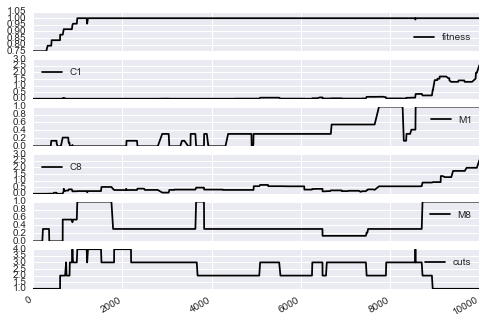

In [20]:
q = pd.concat([ff, cf, mf, cuts], axis=1)
q.plot(y=['fitness', 'C1', 'M1', 'C8', 'M8', 'cuts'], subplots=True)

In [24]:
cuts.query('cuts == 1').head()

,cuts
4555,1
4567,1
4573,1
4589,1
4591,1


In [21]:
n = anc.network_at_generation(2000)

In [24]:
show_network(n)

NameError: name 'n' is not defined

saving test


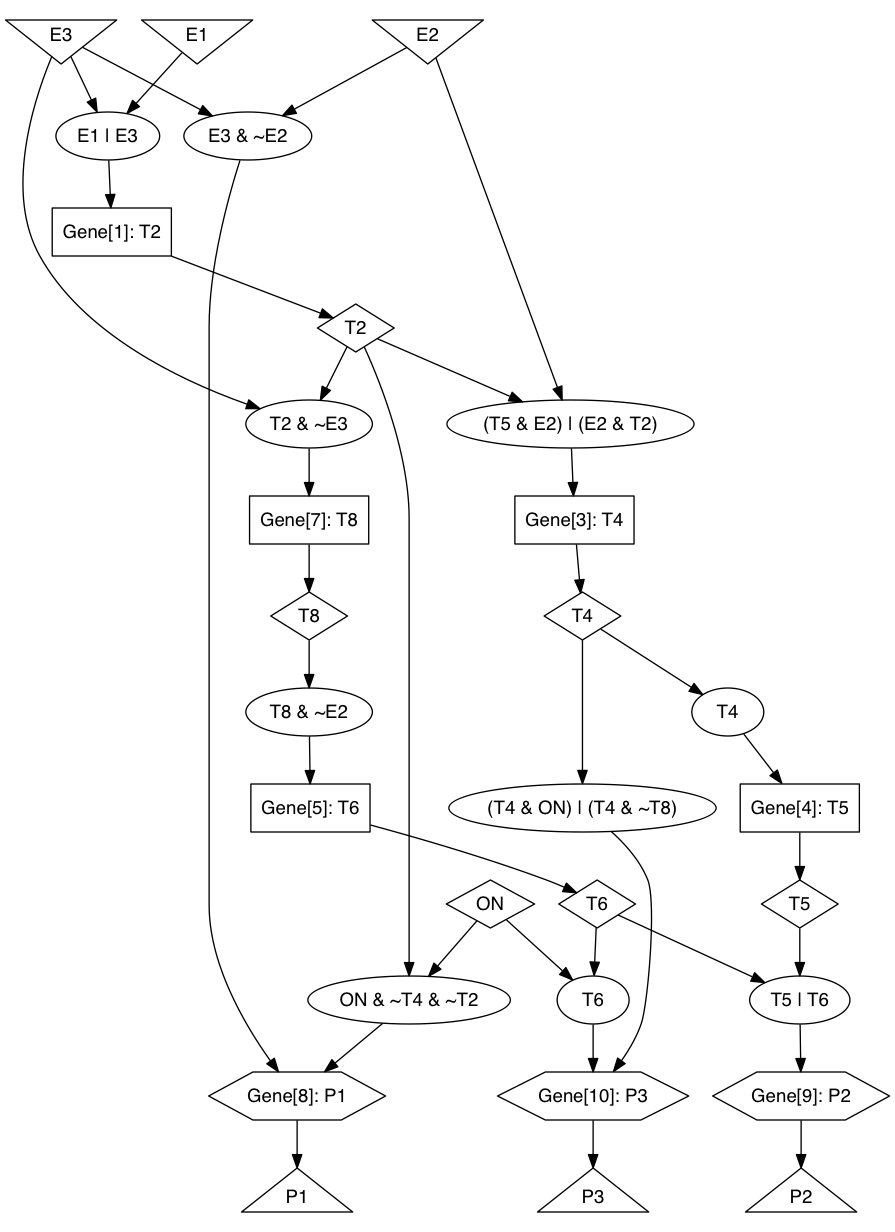

In [26]:
show_network(anc.network_at_generation(8000))

saving test


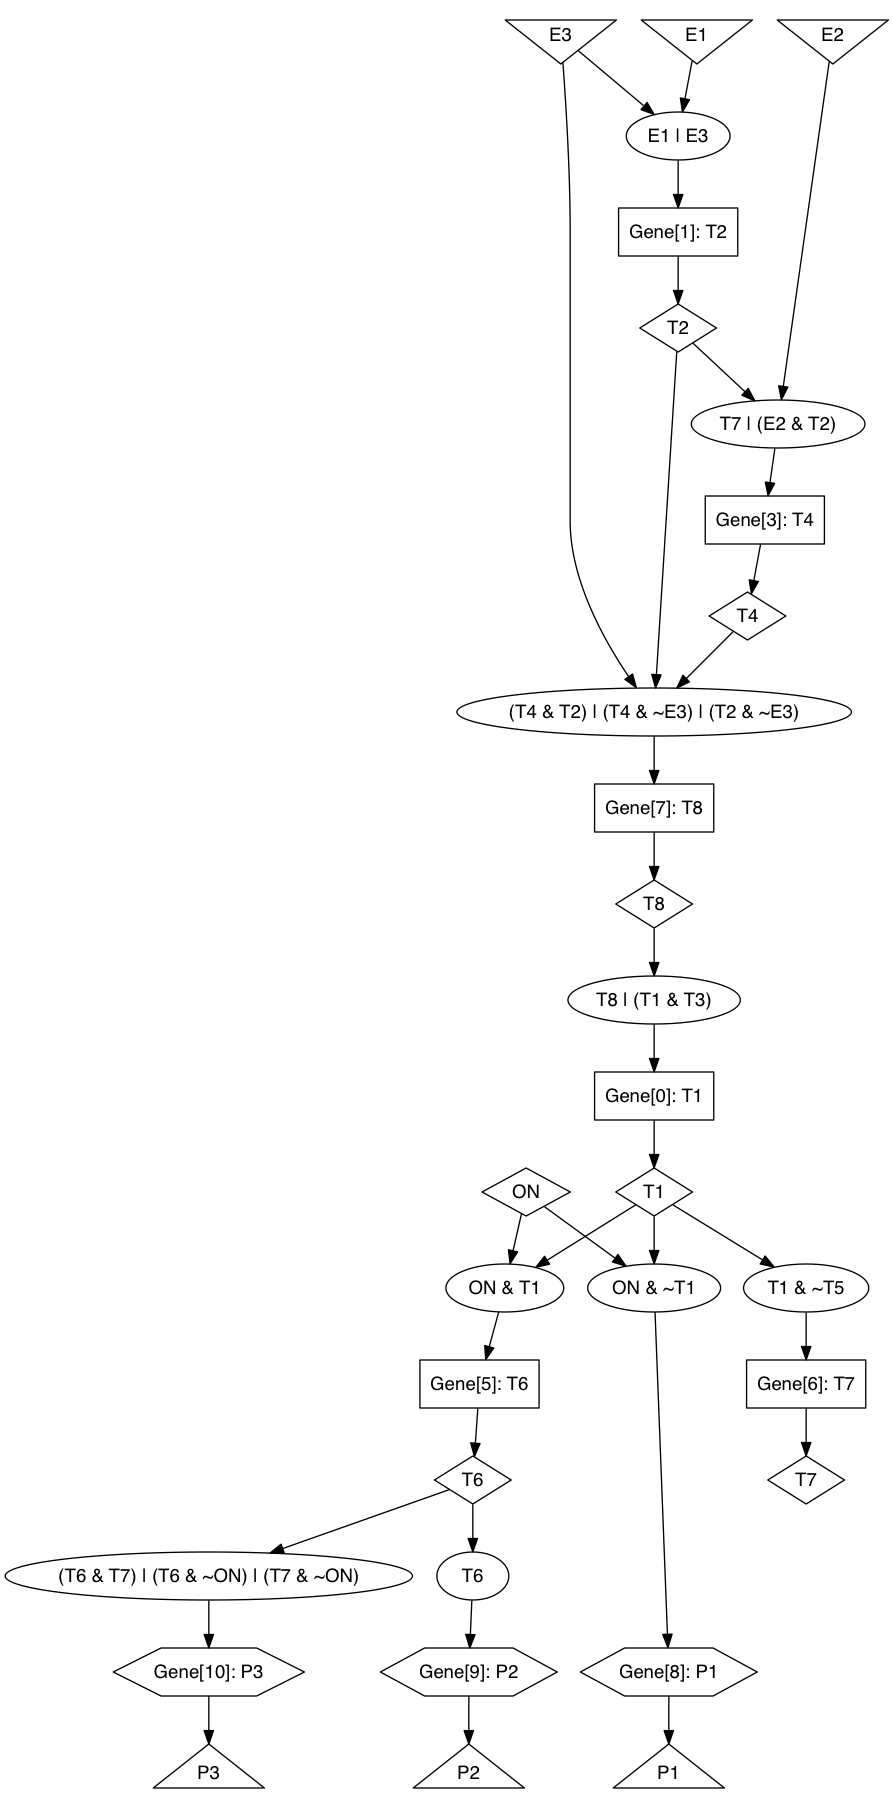

In [33]:
show_network(anc.network_at_generation(10000))

In [23]:
ana = NetworkAnalysis(n)
cg = graph.SignalFlowGraph(ana)
cg.minimum_cut()

{(2, 6), (2, 8), (2, 10), (2, 12)}

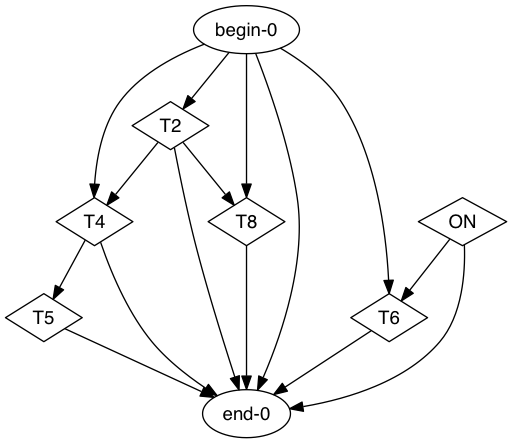

In [25]:
dot = graph.DotMaker(cg)
dot.save_picture('x.png')
Image('x.png')

In [28]:
pc.max()

C1    2.548795
C2    2.002797
C3    1.480178
C4    2.115949
C5    0.634039
C6    2.311278
C7    2.311278
C8    2.548795
dtype: float64